# Redshift Data of DESIJ0201-2739

Author: Anowar Shajib, S M Rafee Adnan

## Load data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.io import fits
from astropy.stats import SigmaClip
from astropy.visualization import simple_norm
from astropy.wcs import WCS
from photutils.background import Background2D, MedianBackground
from photutils.segmentation import (
    SourceCatalog,
    SourceFinder,
    deblend_sources,
    detect_sources,
)

In [2]:
data, header = fits.getdata("DESIJ1624+0129_F140W_drz_sci.fits", header=True)

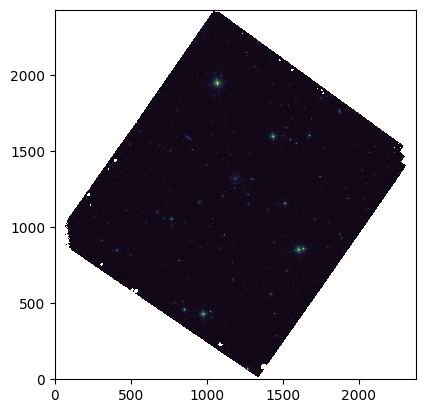

In [3]:
plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

In [5]:
FILENAME = "legacy_DESIJ1624+0129" #need to be changed for each cluster file
data_legacy = pd.read_csv(FILENAME, delimiter=",")
data_legacy.head()

,_r,id,RAJ2000,DEJ2000,release,brickid,objid,type,pstar,gmmcomp,zphot,e_zphot,fclean,fqual
0,0.008151,8000339991003249,245.998974,1.479932,8000,339991,3249,PSF,1.000,P2,1.005,1.786,1,0
1,0.006769,8000339991003477,245.999487,1.483936,8000,339991,3477,REX,0.002,R7,0.757,0.238,1,1
2,0.007441,8000339992002880,246.007014,1.476210,8000,339992,2880,PSF,0.622,P2,0.783,0.404,1,0
3,0.006761,8000339992002969,246.009580,1.477727,8000,339992,2969,REX,0.001,R5,1.003,0.153,1,1
4,0.007945,8000339992002970,246.010036,1.476626,8000,339992,2970,PSF,0.012,P3,0.916,0.255,1,1


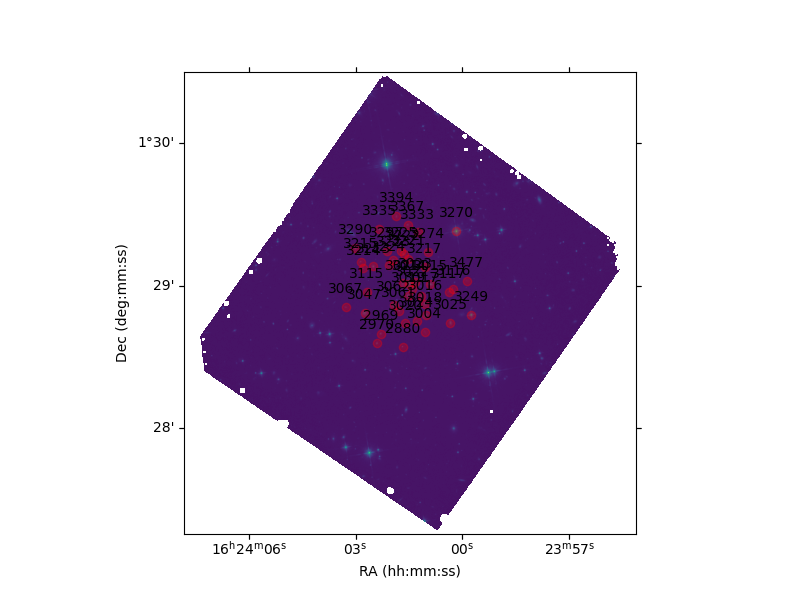

In [6]:
%matplotlib widget
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
#norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap='viridis')

x_scatter, y_scatter = wcs.all_world2pix(data_legacy['RAJ2000'], data_legacy['DEJ2000'], 0)

# Plot scatter points
ax.scatter(x_scatter, y_scatter, color='red', marker='o', label='J2000 RA/Dec', alpha=0.3)

#write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy['objid'][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(f'{obj_id}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels
ax.set_xlabel('RA (hh:mm:ss)')
ax.set_ylabel('Dec (deg:mm:ss)')

plt.show()

In [7]:
#In degrees
center_x, center_y = 246.0062500 , 1.4836111 # RA 16:24:01.5 DEC 01:29:01
radii = 20 # in arcsec
radii_deg = radii/3600

x_upper, y_upper = center_x + radii_deg, center_y + radii_deg 
x_lower, y_lower = center_x - radii_deg, center_y - radii_deg

x_limit_upper, y_limit_upper = wcs.all_world2pix(x_upper, y_upper, 0)
x_limit_lower, y_limit_lower = wcs.all_world2pix(x_lower, y_lower, 0)

print(x_limit_upper, x_limit_lower)

934.2390230369416 1434.0713863568747


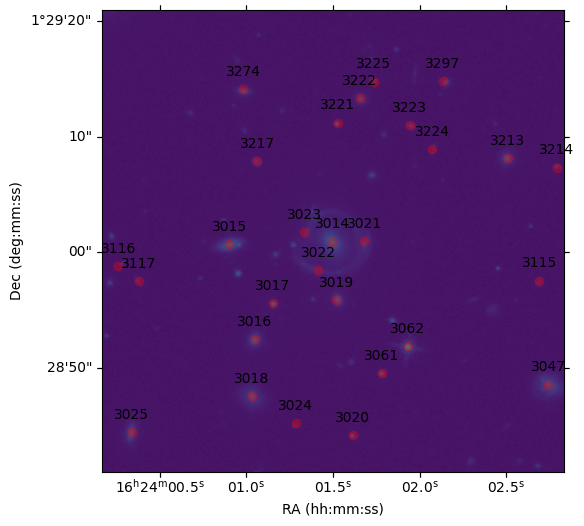

In [9]:
%matplotlib inline

wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
#norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap='viridis')

x_scatter, y_scatter = wcs.all_world2pix(data_legacy['RAJ2000'], data_legacy['DEJ2000'], 0)

# Plot scatter points
ax.scatter(x_scatter, y_scatter, color='red', marker='o', label='J2000 RA/Dec', alpha=0.3)

#write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy['objid'][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(f'{obj_id}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels
ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)
ax.set_xlabel('RA (hh:mm:ss)')
ax.set_ylabel('Dec (deg:mm:ss)')

In [10]:
data_legacy.sort_values(by="objid")

object_ids = [3014, # central deflector
            3019, 3017, 3015, 3016]

columns_to_drop = ['id', 'RAJ2000', 'DEJ2000', 'release', 'brickid']  # List of column names to drop
data_legacy_dropped = data_legacy.drop(columns=columns_to_drop)

selected_data_legacy = data_legacy_dropped[data_legacy_dropped['objid'].isin(object_ids)]
selected_data_legacy.set_index('objid', inplace=True)

print(selected_data_legacy)

             _r type  pstar gmmcomp  zphot  e_zphot  fclean  fqual
objid                                                             
3014   0.000034  DEV  0.005      D8  0.786    0.048       0      0
3015   0.002496  EXP  0.006      E8  0.540    0.086       1      1
3016   0.003026  REX  0.011      R4  0.655    0.050       1      1
3017   0.002091  PSF  0.688      P8  4.136    0.574       1      0
3019   0.001443  REX  0.016      R6  0.915    0.087       0      0
